# 信息论
信息论主要研究是对信号所含的信息的多少进行量化，它基本的思想是一个不太可能发生的时间比非常可能发生的时间能提供更多的信息

## 1.信息量
信息量是信息论中度量信息多少的一个物理量，它从量上反应具有确定概率的事件发生时所传递的信息。香农把信息看作是“一种消除不确定性”的量，而概率正好是表示随机事件发生的可能性大小的一个量，因此，可以用概率来定量描述信息。
在实际运用中，信息量常用概率的负对数来表示，即，$I=-\log_2p$。
用对数表示是为了计算方便。因为直接用概率表示，在求多条信息总共包含的信息量时，要用乘法，而对数可以变求积为求和。另外，随机事件的概率总是小于1，而真实小于1的对数为负的，概率的对数之前冠以负号，其值便成为正数。

## 2.信息熵
信息熵（entropy）又简称为熵，是对随机变量不确定性的度量。熵的概念由鲁道夫·克劳修斯（Rudolf Clausius）于1850年提出，并应用在热力学中。1948年，克劳德·艾尔伍德·香农（Claude Elwood Shannon）第一次将熵的概念引入信息论中，因此它又称为香农熵。
用熵来评价整个随机变量X平均的信息量，而平均最好的量度就是随机变量的期望，即熵的定义如下：

$$
{H(X)} = -\sum^{n}_{i=1}p_i\log_2p_i
$$

这里假设随机变量X的概率分布为：P(X=x<sub>i</sub>)=P<sub>i</sub>i=1, 2, 3, ...., n；信息熵越大，包含的信息就越多，那么随机变量的不确定性就越大。
下面我们通过一个实例进一步说明这个关系。
假设随机变量X服从0-1分布，其概率分布为：
`P(X=1)=p,P(X=0)=1-p`

这时，X的熵为：
$$
{H(X)} = -p\log_2(p)-(1-p)\log_2(1-p)
$$

下面使用python实现概率p和H(X)的关系：

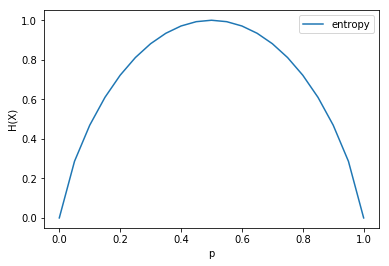

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#定义概率列表
p=np.linspace(0,1.0,21)
HX=[]
for i in p:
    if any([i==0, i==1]):
        HX.append(0)
    else:
        HX.append(-i*np.log2(i)-(1-i)*np.log2(1-i))
plt.plot(p, HX, label='entropy')
plt.xlabel('p')
plt.ylabel('H(X)')
plt.legend()
plt.savefig('x.png')
plt.show()

从这个图形可以看出，当概率为0或1时，H(X)为0，说明此时随机变量没有不确定性，当p=0.5时，随机变量的不确定性最大，即信息量最大。H(X)此时取最大值。

## 3.条件熵
设二位随机变量(X,Y)，其联合概率分布为：
$$
{P(X=x_i,Y=y_i)} = p_{ij}, i=1,2,\cdots,n; j=1,2,\cdots,m
$$
条件熵H(Y|X)表示在已知随机变量X的条件下，随机变量Y的不确定性，它的计算公式为：
$$
{H(Y|X)} =-\sum^n_{n=1}\sum^m_{j=1}p(X=x_i,Y=y_i)x\log{p(Y=y_i|X=x_i)}
$$
这个条件熵不是指随机变量X在给定某个数的情况下，另一个变量的熵是多少，以及变量的不确定性是多少，而是期望，因为条件熵中X也是一个变量，意思是在一个变量X的条件下（变量X的每个值都会取），另一个变量Y熵对X的期望。
条件熵比熵多了一些背景知识，按理说条件熵的不确定性小于熵的不确定性，即H(Y|X)≤H(Y)，事实也是如此，下面这个定理有力地说明了这一点。
定理：对二维随机变量（X, Y），条件熵H（Y|X）和信息熵H（Y）满足如下关系：

$$
{H(Y|X)} \leq{H(Y)}
$$

## 4.互信息
互信息（mutual information）又称为信息增益，用来评价一个事件的出现对于另一个事件的出现所贡献的信息量。记为：
$$
{H(Y|X)}=H(Y)-H(Y|X)
$$
在决策树的特征选择中，信息增益为主要依据。在给定训练数据集D，假设数据集由n维特征构成，构建决策树时，一个核心问题就是选择哪个特征来划分数据集，使得划分后的纯度最大。一般而言，信息增益越大，意味着使用某属性a来划分所得“纯度提升”越大。因此，我们常用信息增益来构建决策树划分属性。

## 5.相对熵
相对熵（relative entropy），所谓相对，一般是在两个随机变量之间来说，又被称为KL散度（Kullback-Leibler Divergence, KLD)，这里我们假设p(x)和q(x)是X取值的两个概率分布，如p(x)表示X的真实分布，q(x)表示X的训练分布或预测分布，则p对q的相对熵为：
$$
KL(p(x)||q(x))=\sum_{x\in{X}}p(x)\log_2\left(\frac{p(x)}{q(x)}\right)
$$
相对熵有些重要性质：
1. 相对熵不是传统意义上的距离，它没有对称性，即：
1. $p(x)||q(x)) \neq KL(q(x)||p(x))$
1. 当预测分布q(x)与真实分布p(x)完全相等时，相对熵为0；
1. 如果两个分别差异越大，那么相对熵也越大；反之，如果两个分布差异越小，相对熵也越小。
1. 相对熵满足非负性，即$KL(p(x)||q(x))\geq0$。


## 6.交叉熵
交叉熵可在神经网络（机器学习）中作为代价函数，p表示真实标记的分布，q则为训练后的模型的预测标记分布，交叉熵代价函数可以衡量p与q的相似性。交叉熵作为代价函数还有一个好处是使用sigmoid函数（s型函数）在梯度下降时能避免均方误差代价函数学习速率降低的问题，因为学习速率可以被输出的误差所控制。
交叉熵（cross entropy），其定义为:
$$H(p(x0,q(x)))=H(X)+KL(p(x)||q(x))$$
其中：
$$
H(X)=-\sum_{x\in{}X}p(x)\log_2p(x)
$$
$$
KL(p(x)||q(x))=\sum_{x\in{}X}p(x)(\log_2p(x)-\log_2q(x))
$$
化简后为：
$$
H(p(x0,q(x)))=-\sum_{x\in{}X}p(x)\log_2q(x)
$$